### Reading Android Store App Data 

In [58]:
import numpy as np
import pandas as pd 

AndroidDf = pd.read_excel('../data/android_apps.xlsx')
AndroidDf.head()

,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
0,FSP Power App,2. October 2013,500,12M,com.fspapp,0.0,3.9677419662475586,1.0.6,31,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
1,FSP Autofahrer-App,5. April 2012,500,"1,3M",de.edvserviceputbus.FSP,0.0,3.8181817531585693,1.0.4,11,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
2,Art-picnic FSP,25. Juli 2014,500,"2,7M",by.orangesoft.fsp,0.0,4.722222328186035,1.5,18,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
3,Tennis F.S.P,19. Juli 2013,1,"4,5M",com.createyourapps.tennisfsp,0.0,0,1.1,0,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
4,Super Piano FREE HD,19. Januar 2014,100000,"4,1M",idteam.app.crazypianofree,0.0,3.9825241565704346,5.9,1545,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...


### Analysing and converting data to the appropriate format

In [59]:
AndroidDf.dtypes

name               object
datePublished      object
numDownloadsMin    object
fileSize           object
packageName        object
price              object
aggregateRating    object
softwareVersion    object
ratingCount        object
dateCrawled        object
url                object
dtype: object

In [109]:
AndroidDf["numDownloadsMin"] = pd.to_numeric(AndroidDf["numDownloadsMin"], errors='coerce')
AndroidDf["price"] = pd.to_numeric(AndroidDf["price"], errors='coerce')

AndroidDf["aggregateRating"] = pd.to_numeric(AndroidDf["aggregateRating"], errors='coerce')
AndroidDf["ratingCount"] = pd.to_numeric(AndroidDf["ratingCount"], errors='coerce')



In [110]:
AndroidDf.dtypes

name                object
datePublished       object
numDownloadsMin    float64
fileSize            object
packageName         object
price              float64
aggregateRating    float64
softwareVersion     object
ratingCount          int64
dateCrawled         object
url                 object
dtype: object

In [111]:
AndroidDf.head()

,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
4,Super Piano FREE HD,19. Januar 2014,100000.0,"4,1M",idteam.app.crazypianofree,0.0,3.982524,5.9,1545,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
6,Beach Buggy Racing,25. September 2014,1000000.0,75M,com.vectorunit.purple.googleplay,0.0,4.245816,1.0.4,72359,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
7,LEGOÆ Juniors Create &amp; Cruise,6. Februar 2014,10000000.0,37M,com.lego.bricksmore,0.0,3.893223,2.0.2,134796,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
9,Whatís New In Logic Pro X,18. Juli 2013,5000.0,106M,com.nonlineareducating.logicpro100,0.0,4.407407,1.0,54,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
10,Music Hero Rock,9. Juli 2014,100000.0,34M,com.geegee.guitarrock,0.0,3.632439,1.0.3,4957,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...


In [112]:
AndroidDf["aggregateRating"].describe()

count    144926.000000
mean          3.931054
std           0.434016
min           1.000000
25%           3.692308
50%           3.978789
75%           4.227739
max           4.990635
Name: aggregateRating, dtype: float64

In [113]:
AndroidDf = AndroidDf[AndroidDf["aggregateRating"] < 5]

In [114]:
AndroidDf.aggregateRating.describe()

count    144926.000000
mean          3.931054
std           0.434016
min           1.000000
25%           3.692308
50%           3.978789
75%           4.227739
max           4.990635
Name: aggregateRating, dtype: float64

In [115]:
AndroidDf = AndroidDf[AndroidDf["aggregateRating"] > 0]

In [116]:
AndroidDf.aggregateRating.describe()  ## AggregateRating was used to clean (delete) a quarter of the data

count    144926.000000
mean          3.931054
std           0.434016
min           1.000000
25%           3.692308
50%           3.978789
75%           4.227739
max           4.990635
Name: aggregateRating, dtype: float64

In [117]:
AndroidDf.price.describe() 

count    144926.000000
mean          0.088040
std           0.926516
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         199.000000
Name: price, dtype: float64

In [118]:
AndroidDf[AndroidDf.price > 50].price.describe()  ## We have enough app above 50 to consired them as valuable

count      5.000000
mean      87.404000
std       62.389113
min       58.130000
25%       59.950000
50%       59.950000
75%       59.990000
max      199.000000
Name: price, dtype: float64

In [119]:
AndroidDf.numDownloadsMin.describe()

count    1.449260e+05
mean     3.190646e+05
std      6.642343e+06
min      5.000000e+03
25%      1.000000e+04
50%      1.000000e+04
75%      1.000000e+05
max      1.000000e+09
Name: numDownloadsMin, dtype: float64

In [120]:
AndroidDf = AndroidDf[AndroidDf.numDownloadsMin > 1000]  ##We filter with only relevant apps

In [121]:
AndroidDf.numDownloadsMin.describe()

count    1.449260e+05
mean     3.190646e+05
std      6.642343e+06
min      5.000000e+03
25%      1.000000e+04
50%      1.000000e+04
75%      1.000000e+05
max      1.000000e+09
Name: numDownloadsMin, dtype: float64

In [122]:
AndroidDf.sort_values(by=["numDownloadsMin"],ascending=False).head()

,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
5327,Facebook,2. October 2014,1.000000e+09,NaN,com.facebook.katana,0.0,3.982016,NaN,21711529,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
2853,Gmail,16. Juli 2014,1.000000e+09,NaN,com.google.android.gm,0.0,4.306069,NaN,1425354,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
11475,Maps,29. August 2014,1.000000e+09,NaN,com.google.android.apps.maps,0.0,4.334330,NaN,4175221,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
4937,Chrome-Browser ñ Google,4. September 2014,5.000000e+08,NaN,com.android.chrome,0.0,4.253021,NaN,2099460,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...
7112,Street View in Google Maps,9. October 2012,5.000000e+08,258k,com.google.android.street,0.0,4.245933,1.8.1.2,931413,2014-10-05 00:00:00,https://play.google.com/store/apps/details?id=...


In [123]:
AndroidDf.describe()

,numDownloadsMin,price,aggregateRating,ratingCount
count,1.449260e+05,144926.000000,144926.000000,1.449260e+05
mean,3.190646e+05,0.088040,3.931054,7.322989e+03
std,6.642343e+06,0.926516,0.434016,1.286576e+05
min,5.000000e+03,0.000000,1.000000,1.000000e+00
25%,1.000000e+04,0.000000,3.692308,1.150000e+02
50%,1.000000e+04,0.000000,3.978789,3.460000e+02
75%,1.000000e+05,0.000000,4.227739,1.370000e+03
max,1.000000e+09,199.000000,4.990635,2.171153e+07


In [125]:
AndroidDf.ratingCount.describe()

count    1.449260e+05
mean     7.322989e+03
std      1.286576e+05
min      1.000000e+00
25%      1.150000e+02
50%      3.460000e+02
75%      1.370000e+03
max      2.171153e+07
Name: ratingCount, dtype: float64

In [127]:
AndroidDf.ratingCount.min()

1

In [129]:
AndroidDf = AndroidDf[AndroidDf.ratingCount > 100]

In [130]:
AndroidDf.ratingCount.describe()

count    1.131220e+05
mean     9.365797e+03
std      1.455596e+05
min      1.010000e+02
25%      2.350000e+02
50%      5.920000e+02
75%      2.074000e+03
max      2.171153e+07
Name: ratingCount, dtype: float64

In [132]:
sample = AndroidDf.copy()[['name','numDownloadsMin','price','aggregateRating','ratingCount']]
sample.head()

,name,numDownloadsMin,price,aggregateRating,ratingCount
4,Super Piano FREE HD,100000.0,0.0,3.982524,1545
6,Beach Buggy Racing,1000000.0,0.0,4.245816,72359
7,LEGOÆ Juniors Create &amp; Cruise,10000000.0,0.0,3.893223,134796
10,Music Hero Rock,100000.0,0.0,3.632439,4957
13,Clean Electric Guitar Plugin,1000000.0,0.0,3.480225,20053


In [134]:
sample.dtypes

name                object
numDownloadsMin    float64
price              float64
aggregateRating    float64
ratingCount          int64
dtype: object

### Plotting data

In [135]:
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline


In [152]:
ranges = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
labels = ['0-0.5','0.5-1','1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']

sample["Rank"]=pd.cut(sample.aggregateRating, ranges, labels=labels).astype('category')
sample.head()

,name,numDownloadsMin,price,aggregateRating,ratingCount,Rank
4,Super Piano FREE HD,"100,000.00",0.00,3.98,1545,3.5-4
6,Beach Buggy Racing,"1,000,000.00",0.00,4.25,72359,4-4.5
7,LEGOÆ Juniors Create &amp; Cruise,"10,000,000.00",0.00,3.89,134796,3.5-4
10,Music Hero Rock,"100,000.00",0.00,3.63,4957,3.5-4
13,Clean Electric Guitar Plugin,"1,000,000.00",0.00,3.48,20053,3-3.5


In [181]:
p1 = pd.DataFrame(data=sample.groupby("Rank").numDownloadsMin.mean())
p1.columns=['AverageDownloads']
p1.head()

,AverageDownloads
Rank,
0-0.5,nan
0.5-1,nan
1-1.5,"270,000.00"
1.5-2,"203,902.44"
2-2.5,"335,921.72"


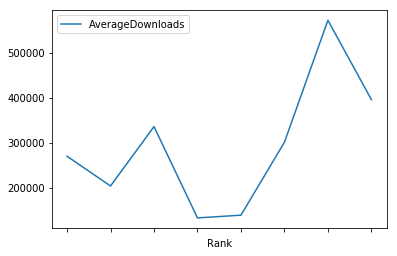

In [182]:
p1.plot()

In [190]:
p2 = sample.groupby("Rank").price.describe()
p2

,count,mean,std,min,25%,50%,75%,max
Rank,,,,,,,,
0-0.5,0.00,nan,nan,nan,nan,nan,nan,nan
0.5-1,0.00,nan,nan,nan,nan,nan,nan,nan
1-1.5,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1.5-2,82.00,0.01,0.08,0.00,0.00,0.00,0.00,0.75
2-2.5,396.00,0.08,0.47,0.00,0.00,0.00,0.00,4.49
2.5-3,"1,961.00",0.07,0.50,0.00,0.00,0.00,0.00,7.32
3-3.5,"10,606.00",0.06,0.94,0.00,0.00,0.00,0.00,59.95
3.5-4,"43,141.00",0.05,0.61,0.00,0.00,0.00,0.00,59.95
4-4.5,"48,545.00",0.13,1.26,0.00,0.00,0.00,0.00,199.00


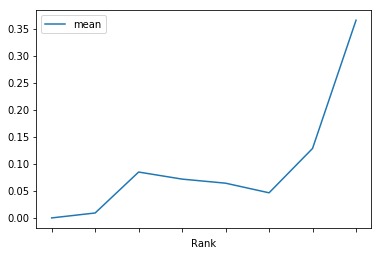

In [189]:
p2.plot(y='mean')